<a href="https://colab.research.google.com/github/zahrakazemiii/NRSC2200/blob/main/ZahraKazemi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from scipy.io import loadmat       # Import function to read data.
from pylab import *                # Import numerical and plotting functions
from IPython.lib.display import YouTubeVideo  # Enable YouTube videos
rcParams['figure.figsize']=(12,3)  # Change the default figure size

In [2]:
data = loadmat('02_EEG-1.mat')
EEGa = data['EEGa']                             # ... and get the EEG from one condition,
t = data['t'][0]                                # ... and a time axis,
ntrials = len(EEGa)                             # ... and compute the number of trials.

mn = EEGa.mean(0)                               # Compute the mean signal across trials (the ERP).
sd = EEGa.std(0)                                # Compute the std of the signal across trials.
sdmn = sd / sqrt(ntrials)                       # Compute the std of the mean.

#**Question 1**

Using the EEGa variable, plot data from a single trial against time, and then plot the
average data across trials on top of that. You can use the command “plt.ylim([-1,1])”
to control the y-axis limits of this plot and the next. Share the plot – is it possible to
see some of the ERP structure in single trial data?

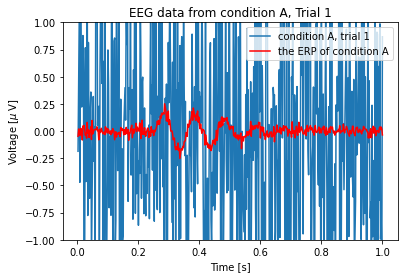

In [3]:
plt.plot(t,EEGa[0],label='condition A, trial 1')
plt.plot(t,EEGa.mean(0),'r',label='the ERP of condition A')  
plt.xlabel('Time [s]')                   # Label the x-axis as time.
plt.ylabel('Voltage [$\mu$ V]')          # Label the y-axis as voltage.
plt.title('EEG data from condition A, Trial 1')  # Add a title
plt.legend(loc='best')
plt.ylim([-1,1])
plt.show()

Now make the same plot, but instead of plotting a single trial, plot the average of a
subset of the data (e.g. 10 trials) with the overall average from all trials. Add more
and more trials to your subset-average (10, 20, 30, 50 …) and note what happens to
the subset-average. How many trials do you need to add to the subset in order for
the peaks and troughs of the ERP to be visible in the subset? Share a plot of that
subset with the overall average, and indicate how many trials you included.

In [4]:
# generate random integer values
from random import seed
from random import randint
seed(254)
random_ind_10 = [randint(0,ntrials) for i in range(10)]

In [5]:
def plot_random_trials_and_ERP(ind,n):
  EEGa_random = EEGa[ind]
  plt.plot(t,EEGa_random.mean(0),label=f"average of {n} random trials")
  plt.plot(t,EEGa.mean(0),label='the ERP of condition A')  
  plt.legend(loc='best')
  plt.show()

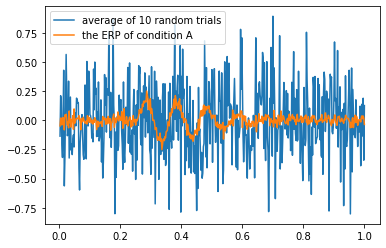

In [6]:
plot_random_trials_and_ERP(random_ind_10,10)

In [7]:
random_ind_20 = [randint(0,ntrials) for i in range(20)]
random_ind_30 = [randint(0,ntrials) for i in range(30)]
random_ind_50 = [randint(0,ntrials) for i in range(50)]
random_ind_100 = [randint(0,ntrials) for i in range(100)]

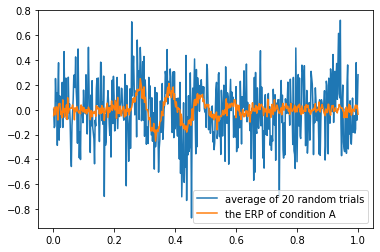

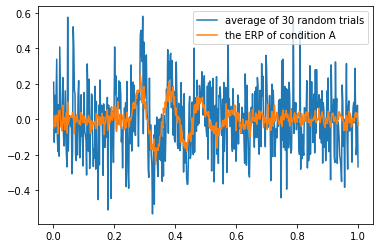

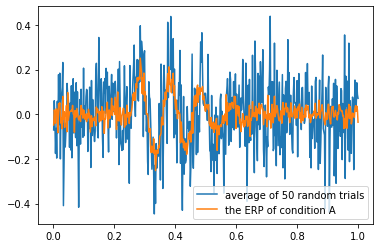

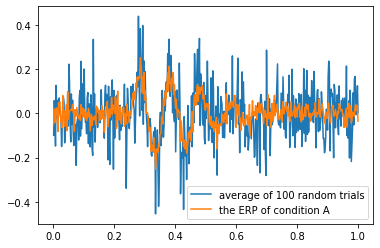

In [8]:
plot_random_trials_and_ERP(random_ind_20,20)
plot_random_trials_and_ERP(random_ind_30,30)
plot_random_trials_and_ERP(random_ind_50,50)
plot_random_trials_and_ERP(random_ind_100,100)

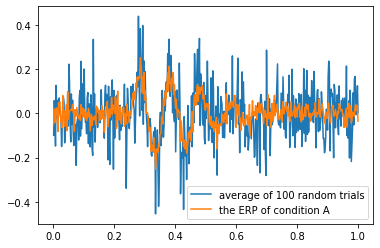

In [9]:
#it seems like with 100 trials we can reflect the peaks and troughs of the ERP
plot_random_trials_and_ERP(random_ind_100,100)

You might find that the shape of the ERP is already quite well-defined with less than
the full 1000 trials. Why might it still be a good idea to collect 1000 trials?

#**Question 2**

Make a new array variable, “artifacts” that has the same shape as the EEGa variable
but serves as a logical index indicating the timepoints in individual trials where the
EEG signal is more than two standard deviations of the mean larger or smaller than
the average across trials. The section of Module 1 “Selecting elements that satisfy a
condition” will be helpful. You might use the function np.abs to get the absolute
value of a set of positive and negative numbers (e.g. differences). Share the code
for generating the artifact variable.

In [10]:
import pandas as pd
mn = EEGa.mean(0)  # Compute the mean across trials (the ERP)
sd = EEGa.std(0)  # Compute the std across trials
artifact = np.abs(EEGa - mn) > (2 * sd)

In [11]:
artifact

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [ True, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [12]:
np.mean(artifact.sum(1) / artifact.shape[1]) * 100

4.5616